# Data Cleaning using Pandas and NumPy
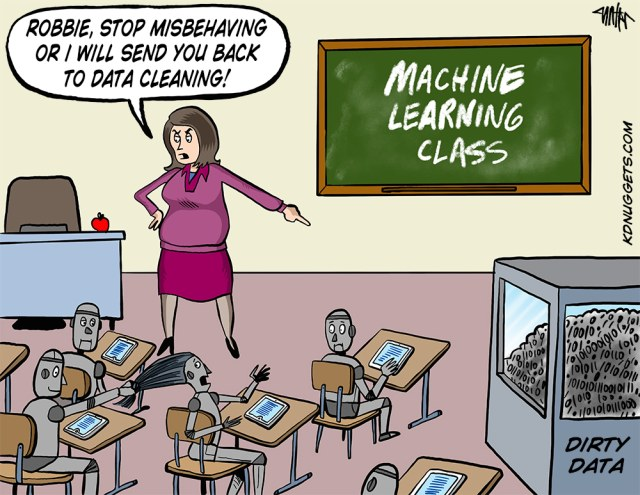
PC: KDNuggets

> Cleaning datasets is an integral part of being a Data Scientist. In fact, a lot of Data Scientists agree that obtaining and cleaning data is 80% of the job as a Data Scientist. It is important to know how to clean a dataset that has a number of Nan rows and columns and inconsistent formatting. Data in the real world is not always well-structured and model-training ready. It is also a very time consuming process, so learning the skills to cleverly use Pandas and NumPy can help you considerbly save time and get going with more intersting stuff!

> In this notebook, we will do exactly that! We will look at how to clean a table accquired from **data.census.gov**. We are going to be working with the **POVERTY STATUS IN THE PAST 12 MONTHS Table Data**

>We will cover the following:
1. Importing csv file into pandas as DataFrames
2. Dropping columns in a DataFrame
2. Tiding up fields in the data whilst retaining information
3. Filtering and selecting rows in Pandas
4. Cleaning the entire dataset using the **apply** function
5. Renaming columns to have more consistent names
6. Reset and drop index of a DataFrame
7. Converting columns to appropriate datatypes
8. Visualozing the clean data set using Plotly

## Table Information
> Link : [Poverty Dataset](https://data.census.gov/cedsci/table?q=poverty%20&hidePreview=false&tid=ACSST1Y2018.S1701&t=Poverty&vintage=2018)

> **POVERTY STATUS IN THE PAST 12 MONTHS**
>* Survey/Program: American Community Survey
>* Year: 2018
>* Estimates: 1-Year
>* Table ID: S1701

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px

In [3]:
poverty_DF = pd.read_csv('poverty_status_2018.csv')

In [116]:
poverty_DF.head(5)

,Estimates,Population for whom poverty status is determined,AGE,Under 18 years,Under 5 years,5 to 17 years,Related children of householder under 18 years,18 to 64 years,18 to 34 years,35 to 64 years,...,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 years and over,Mean income deficit for unrelated individuals (dollars),"Worked full-time, year-round in the past 12 months.1","Worked less than full-time, year-round in the past 12 months",Did not work.1,State
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska
1,Total Est,"720,869",NaN,"180,258","51,329","128,929","179,037","454,213","176,700","277,513",...,"20,671","23,226","26,513","18,249","9,989","7,887","71,525","42,795","38,343",Alaska
2,BPL,"78,620",NaN,"25,327","8,384","16,943","24,235","47,464","22,444","25,020",...,"4,514","4,967","5,197","2,319","1,192",(X),"2,164","12,740","15,972",Alaska
3,BPL %,10.90%,NaN,14.10%,16.30%,13.10%,13.50%,10.40%,12.70%,9.00%,...,21.80%,21.40%,19.60%,12.70%,11.90%,(X),3.00%,29.80%,41.70%,Alaska
4,Maine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maine


In [5]:
poverty_DF.shape

(520, 69)

In [6]:
poverty_DF.columns

Index(['Estimates', 'Population for whom poverty status is determined', 'AGE',
       'Under 18 years', 'Under 5 years', '5 to 17 years',
       'Related children of householder under 18 years', '18 to 64 years',
       '18 to 34 years', '35 to 64 years', '60 years and over',
       '65 years and over', 'SEX', 'Male', 'Female',
       'RACE AND HISPANIC OR LATINO ORIGIN', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Hispanic or Latino origin (of any race)',
       'White alone, not Hispanic or Latino', 'EDUCATIONAL ATTAINMENT',
       'Population 25 years and over', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college, associate's degree', 'Bachelor's degree or higher',
       'EMPLOYMENT STATUS', 'Civilian labor force 16 years and over'

<div class="alert alert-block alert-warning">  
<h4>📝 COMMENTS</h4>
<li>By just looking at the first 10 rows, we can see a lot of NaN values. We also notice that the NaNs are present because we have additional rows and columns that do not carry any information.
<li>There are 69 columns and they contain information about <b>AGE, SEX, RACE,EMPLOYMENT STATUS,WORK EXPERIENCE, INCOME, UNRELATED INDIVIDUALS</b>. We can create a table for each of these categories.
<li>The first thing I am going to do is create a seperate Column called State and store the state to which the row belongs too.
</div>

In [7]:
poverty_DF['State'] = 'Nan'
for i in range(0,len(poverty_DF),10):
    state = poverty_DF.iloc[i]['Estimates']
    poverty_DF.loc[i:i+10,'State'] = state
poverty_DF.head(5)

,Estimates,Population for whom poverty status is determined,AGE,Under 18 years,Under 5 years,5 to 17 years,Related children of householder under 18 years,18 to 64 years,18 to 34 years,35 to 64 years,...,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 years and over,Mean income deficit for unrelated individuals (dollars),"Worked full-time, year-round in the past 12 months.1","Worked less than full-time, year-round in the past 12 months",Did not work.1,State
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska
1,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska
2,Estimate,"720,869",NaN,"180,258","51,329","128,929","179,037","454,213","176,700","277,513",...,"20,671","23,226","26,513","18,249","9,989","7,887","71,525","42,795","38,343",Alaska
3,Margin of Error,+/-846,NaN,"+/-1,074",+/-834,"+/-1,091","+/-1,221","+/-1,628","+/-1,899","+/-2,696",...,"+/-2,220","+/-2,149","+/-2,110","+/-1,834","+/-1,050",+/-459,"+/-3,973","+/-3,644","+/-2,870",Alaska
4,Below poverty level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska


<div class="alert alert-block alert-warning">  
<h4>📝 COMMENTS</h4>
<p>Next, I remove the <b>Margin of Error</b> for each corresponding State. I want to keep only the <b>Estimate</b> information for each State. I do this by filtering out all the rows that don't have it the Estimates values as "Margin of Error" and store it back into the same DataFrame.</p>
</div>

In [8]:
poverty_DF = poverty_DF[poverty_DF['Estimates'] != 'Margin of Error']
poverty_DF.head(5)

,Estimates,Population for whom poverty status is determined,AGE,Under 18 years,Under 5 years,5 to 17 years,Related children of householder under 18 years,18 to 64 years,18 to 34 years,35 to 64 years,...,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 years and over,Mean income deficit for unrelated individuals (dollars),"Worked full-time, year-round in the past 12 months.1","Worked less than full-time, year-round in the past 12 months",Did not work.1,State
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska
1,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska
2,Estimate,"720,869",NaN,"180,258","51,329","128,929","179,037","454,213","176,700","277,513",...,"20,671","23,226","26,513","18,249","9,989","7,887","71,525","42,795","38,343",Alaska
4,Below poverty level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska
5,Estimate,"78,620",NaN,"25,327","8,384","16,943","24,235","47,464","22,444","25,020",...,"4,514","4,967","5,197","2,319","1,192",(X),"2,164","12,740","15,972",Alaska


<div class="alert alert-block alert-warning">  
<h4>📝 COMMENTS</h4>
    <p>Next, I write a function to edit the <b>Estimates</b> columns. If the row has a value <b>Estimate</b> in it, I will change it to the following:
    <li> <b>Total Estimate</b>, if it is below the row containing <b>Total</b>
    <li> <b>BPL Estimate</b>, if it is below the row containing <b>Below poverty level</b>
    <li> <b>BPL % Estimate</b>, if it is below the row containing <b>Percent below poverty level</b>
    </p>
</div>

In [9]:
estimates = []
def edit_estimate(cols):
    if cols == "Total":
        estimates.append(cols)
        estimates.append('Total Est')
        #print(estimates)
    elif cols == 'Below poverty level':
        estimates.append(cols)
        estimates.append('BPL')  
    elif cols == 'Percent below poverty level':
        estimates.append(cols)
        estimates.append('BPL %') 
    elif cols == 'Estimate':
        pass
    else:
        estimates.append(cols)
poverty_DF['Estimates'].apply(edit_estimate)
print(len(estimates))
print(len(poverty_DF))
poverty_DF['Estimates'] = estimates

364
364


In [117]:
poverty_DF.head(5)

,Estimates,Population for whom poverty status is determined,AGE,Under 18 years,Under 5 years,5 to 17 years,Related children of householder under 18 years,18 to 64 years,18 to 34 years,35 to 64 years,...,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 years and over,Mean income deficit for unrelated individuals (dollars),"Worked full-time, year-round in the past 12 months.1","Worked less than full-time, year-round in the past 12 months",Did not work.1,State
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska
1,Total Est,"720,869",NaN,"180,258","51,329","128,929","179,037","454,213","176,700","277,513",...,"20,671","23,226","26,513","18,249","9,989","7,887","71,525","42,795","38,343",Alaska
2,BPL,"78,620",NaN,"25,327","8,384","16,943","24,235","47,464","22,444","25,020",...,"4,514","4,967","5,197","2,319","1,192",(X),"2,164","12,740","15,972",Alaska
3,BPL %,10.90%,NaN,14.10%,16.30%,13.10%,13.50%,10.40%,12.70%,9.00%,...,21.80%,21.40%,19.60%,12.70%,11.90%,(X),3.00%,29.80%,41.70%,Alaska
4,Maine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maine


<div class="alert alert-block alert-warning">  
<h4>📝 COMMENTS</h4>
<p>Now that I have captured the information of the rows labelled <b>Total, Below poverty level and Percent below poverty level</b>, we can go ahead and delete them.</p>
</div>

In [11]:
poverty_DF = poverty_DF[poverty_DF['Estimates'] != 'Total']
poverty_DF = poverty_DF[poverty_DF['Estimates'] != 'Below poverty level']
poverty_DF = poverty_DF[poverty_DF['Estimates'] != 'Percent below poverty level']
poverty_DF.reset_index(drop = True, inplace = True)
poverty_DF.head(5)

,Estimates,Population for whom poverty status is determined,AGE,Under 18 years,Under 5 years,5 to 17 years,Related children of householder under 18 years,18 to 64 years,18 to 34 years,35 to 64 years,...,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 years and over,Mean income deficit for unrelated individuals (dollars),"Worked full-time, year-round in the past 12 months.1","Worked less than full-time, year-round in the past 12 months",Did not work.1,State
0,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska
1,Total Est,"720,869",NaN,"180,258","51,329","128,929","179,037","454,213","176,700","277,513",...,"20,671","23,226","26,513","18,249","9,989","7,887","71,525","42,795","38,343",Alaska
2,BPL,"78,620",NaN,"25,327","8,384","16,943","24,235","47,464","22,444","25,020",...,"4,514","4,967","5,197","2,319","1,192",(X),"2,164","12,740","15,972",Alaska
3,BPL %,10.90%,NaN,14.10%,16.30%,13.10%,13.50%,10.40%,12.70%,9.00%,...,21.80%,21.40%,19.60%,12.70%,11.90%,(X),3.00%,29.80%,41.70%,Alaska
4,Maine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maine


In [12]:
poverty_DF.columns

Index(['Estimates', 'Population for whom poverty status is determined', 'AGE',
       'Under 18 years', 'Under 5 years', '5 to 17 years',
       'Related children of householder under 18 years', '18 to 64 years',
       '18 to 34 years', '35 to 64 years', '60 years and over',
       '65 years and over', 'SEX', 'Male', 'Female',
       'RACE AND HISPANIC OR LATINO ORIGIN', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Hispanic or Latino origin (of any race)',
       'White alone, not Hispanic or Latino', 'EDUCATIONAL ATTAINMENT',
       'Population 25 years and over', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college, associate's degree', 'Bachelor's degree or higher',
       'EMPLOYMENT STATUS', 'Civilian labor force 16 years and over'

<div class="alert alert-block alert-warning">  
<h4>📝 COMMENTS</h4>
<p>Great! Now let's divide them into seperate DataFrames based on the following categories:
<li> <b>AGE:</b> poverty_by_age
<li> <b>SEX:</b> poverty_by_sex
<li> <b>RACE AND HISPANIC OR LATINO ORIGIN:</b> poverty_by_race
<li> <b>EDUCATIONAL ATTAINMENT:</b> poverty_by_edu_att
<li> <b>EMPLOYMENT STATUS:</b> poverty_by_emp_status
<li> <b>WORK EXPERIENCE:</b> poverty_by_work_exp
<li> <b>INCOME BELOW POVERTY RATIOS:</b> poverty_by_income
<li> <b>UNRELATED INDIVIDUALS:</b> poverty_by_unrelated_ind
</p>
    
</div>

In [13]:
poverty_by_age = poverty_DF[['Estimates', 
                             'State',
                             'Population for whom poverty status is determined', 
                             'Under 18 years', 
                             'Under 5 years', 
                             '5 to 17 years',
                             'Related children of householder under 18 years', 
                             '18 to 64 years',
                             '18 to 34 years', 
                             '35 to 64 years', 
                             '60 years and over',
                             '65 years and over']]
poverty_by_age.dropna(inplace = True)
poverty_by_age.reset_index(inplace = True,drop = True)
poverty_by_age.head(5)

,Estimates,State,Population for whom poverty status is determined,Under 18 years,Under 5 years,5 to 17 years,Related children of householder under 18 years,18 to 64 years,18 to 34 years,35 to 64 years,60 years and over,65 years and over
0,Total Est,Alaska,"720,869","180,258","51,329","128,929","179,037","454,213","176,700","277,513","132,192","86,398"
1,BPL,Alaska,"78,620","25,327","8,384","16,943","24,235","47,464","22,444","25,020","9,992","5,829"
2,BPL %,Alaska,10.90%,14.10%,16.30%,13.10%,13.50%,10.40%,12.70%,9.00%,7.60%,6.70%
3,Total Est,Maine,"1,301,941","240,662","61,960","178,702","238,546","793,679","248,843","544,836","375,495","267,600"
4,BPL,Maine,"151,541","34,878","9,594","25,284","32,908","92,402","37,100","55,302","36,400","24,261"


In [14]:
poverty_by_age.isnull().sum()

Estimates                                           0
State                                               0
Population for whom poverty status is determined    0
Under 18 years                                      0
Under 5 years                                       0
5 to 17 years                                       0
Related children of householder under 18 years      0
18 to 64 years                                      0
18 to 34 years                                      0
35 to 64 years                                      0
60 years and over                                   0
65 years and over                                   0
dtype: int64

In [15]:
poverty_by_sex = poverty_DF[['Estimates', 
                             'State',
                             'Population for whom poverty status is determined',
                             'Male', 
                             'Female']]
poverty_by_sex.dropna(inplace = True)
poverty_by_sex.reset_index(inplace = True,drop = True)
poverty_by_sex.head(5)

,Estimates,State,Population for whom poverty status is determined,Male,Female
0,Total Est,Alaska,"720,869","370,771","350,098"
1,BPL,Alaska,"78,620","38,912","39,708"
2,BPL %,Alaska,10.90%,10.50%,11.30%
3,Total Est,Maine,"1,301,941","635,636","666,305"
4,BPL,Maine,"151,541","65,931","85,610"


In [16]:
poverty_by_sex.isnull().sum()

Estimates                                           0
State                                               0
Population for whom poverty status is determined    0
Male                                                0
Female                                              0
dtype: int64

In [112]:
poverty_by_race = poverty_DF[[
            'Estimates', 
            'State',
            'Population for whom poverty status is determined',
            'White alone',
            'Black or African American alone',
            'American Indian and Alaska Native alone', 'Asian alone',
            'Native Hawaiian and Other Pacific Islander alone',
            'Some other race alone', 'Two or more races',
            'Hispanic or Latino origin (of any race)',
            'White alone, not Hispanic or Latino']]
poverty_by_race.dropna(inplace = True)
poverty_by_race.reset_index(inplace = True,drop = True)
poverty_by_race.head(5)

,Estimates,State,Population for whom poverty status is determined,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino origin (of any race),"White alone, not Hispanic or Latino"
0,Total Est,Alaska,"720,869","464,926","23,967","107,926","46,023","7,846","9,732","60,449","51,952","434,277"
1,BPL,Alaska,"78,620","34,474","2,719","24,632","6,567","2,267",733,"7,228","4,820","32,089"
2,BPL %,Alaska,10.90%,7.40%,11.30%,22.80%,14.30%,28.90%,7.50%,12.00%,9.30%,7.40%
3,Total Est,Maine,"1,301,941","1,229,684","17,514","8,192","14,583",N,N,"28,350","20,688","1,214,331"
4,BPL,Maine,"151,541","138,045","3,531","2,865",861,N,N,"5,198","5,389","133,986"


In [18]:
poverty_by_race.isnull().sum()

Estimates                                           0
State                                               0
Population for whom poverty status is determined    0
White alone                                         0
Black or African American alone                     0
American Indian and Alaska Native alone             0
Asian alone                                         0
Native Hawaiian and Other Pacific Islander alone    0
Some other race alone                               0
Two or more races                                   0
Hispanic or Latino origin (of any race)             0
White alone, not Hispanic or Latino                 0
dtype: int64

In [19]:
poverty_by_edu_att = poverty_DF[[
                'Estimates', 
                'State',
                'Population for whom poverty status is determined',
                'Population 25 years and over', 'Less than high school graduate',
                'High school graduate (includes equivalency)',
                "Some college, associate's degree", 
                "Bachelor's degree or higher",              
                ]]
poverty_by_edu_att.dropna(inplace = True)
poverty_by_edu_att.reset_index(inplace = True,drop = True)
poverty_by_edu_att.head(5)

,Estimates,State,Population for whom poverty status is determined,Population 25 years and over,Less than high school graduate,High school graduate (includes equivalency),"Some college, associate's degree",Bachelor's degree or higher
0,Total Est,Alaska,"720,869","478,760","31,656","133,759","167,511","145,834"
1,BPL,Alaska,"78,620","43,873","6,777","19,063","13,485","4,548"
2,BPL %,Alaska,10.90%,9.20%,21.40%,14.30%,8.10%,3.10%
3,Total Est,Maine,"1,301,941","970,661","66,093","302,809","293,014","308,745"
4,BPL,Maine,"151,541","100,307","16,457","39,471","28,389","15,990"


In [20]:
poverty_by_edu_att.isnull().sum()

Estimates                                           0
State                                               0
Population for whom poverty status is determined    0
Population 25 years and over                        0
Less than high school graduate                      0
High school graduate (includes equivalency)         0
Some college, associate's degree                    0
Bachelor's degree or higher                         0
dtype: int64

In [21]:
poverty_by_emp_status = poverty_DF[[
                    'Estimates', 
                    'State',
                    'Population for whom poverty status is determined',
                    'Civilian labor force 16 years and over',
                    'Employed', 'Male.1', 'Female.1', 'Unemployed', 'Male.2', 'Female.2',
]]
poverty_by_emp_status.dropna(inplace = True)
poverty_by_emp_status.reset_index(inplace = True,drop = True)
poverty_by_emp_status.head(5)

,Estimates,State,Population for whom poverty status is determined,Civilian labor force 16 years and over,Employed,Male.1,Female.1,Unemployed,Male.2,Female.2
0,Total Est,Alaska,"720,869","370,092","344,700","182,981","161,719","25,392","16,131","9,261"
1,BPL,Alaska,"78,620","25,814","17,775","8,312","9,463","8,039","5,279","2,760"
2,BPL %,Alaska,10.90%,7.00%,5.20%,4.50%,5.90%,31.70%,32.70%,29.80%
3,Total Est,Maine,"1,301,941","696,053","671,844","341,628","330,216","24,209","15,076","9,133"
4,BPL,Maine,"151,541","42,881","36,406","15,286","21,120","6,475","3,326","3,149"


In [22]:
poverty_by_emp_status.isnull().sum()

Estimates                                           0
State                                               0
Population for whom poverty status is determined    0
Civilian labor force 16 years and over              0
Employed                                            0
Male.1                                              0
Female.1                                            0
Unemployed                                          0
Male.2                                              0
Female.2                                            0
dtype: int64

In [23]:
poverty_by_work_exp = poverty_DF[[
                        'Estimates', 
                        'State',
                        'Population for whom poverty status is determined',
                        'Population 16 years and over',
                        'Worked full-time, year-round in the past 12 months',
                        'Worked part-time or part-year in the past 12 months', 'Did not work'
]]
poverty_by_work_exp.dropna(inplace = True)
poverty_by_work_exp.reset_index(inplace = True,drop = True)
poverty_by_work_exp.head(5)

,Estimates,State,Population for whom poverty status is determined,Population 16 years and over,"Worked full-time, year-round in the past 12 months",Worked part-time or part-year in the past 12 months,Did not work
0,Total Est,Alaska,"720,869","559,276","243,287","158,463","157,526"
1,BPL,Alaska,"78,620","55,473","4,545","21,941","28,987"
2,BPL %,Alaska,10.90%,9.90%,1.90%,13.80%,18.40%
3,Total Est,Maine,"1,301,941","1,090,758","463,457","273,525","353,776"
4,BPL,Maine,"151,541","120,880","8,397","39,962","72,521"


In [24]:
poverty_by_work_exp.isnull().sum()

Estimates                                              0
State                                                  0
Population for whom poverty status is determined       0
Population 16 years and over                           0
Worked full-time, year-round in the past 12 months     0
Worked part-time or part-year in the past 12 months    0
Did not work                                           0
dtype: int64

In [25]:
poverty_by_income = poverty_DF[[
                        'Estimates', 
                        'State',
                        'Population for whom poverty status is determined',  
                        '50 percent of poverty level', '125 percent of poverty level',
                       '150 percent of poverty level', '185 percent of poverty level',
                       '200 percent of poverty level', '300 percent of poverty level',
                       '400 percent of poverty level', '500 percent of poverty level',
]]
poverty_by_income.dropna(inplace = True)
poverty_by_income = poverty_by_income[poverty_by_income['Estimates'] != 'BPL']
poverty_by_income = poverty_by_income[poverty_by_income['Estimates'] != 'BPL %']
poverty_by_income.reset_index(inplace = True,drop = True)
poverty_by_income.head(5)

,Estimates,State,Population for whom poverty status is determined,50 percent of poverty level,125 percent of poverty level,150 percent of poverty level,185 percent of poverty level,200 percent of poverty level,300 percent of poverty level,400 percent of poverty level,500 percent of poverty level
0,Total Est,Alaska,"720,869","37,710","100,355","126,748","167,488","181,502","296,900","393,946","480,098"
1,Total Est,Maine,"1,301,941","60,264","204,217","255,666","344,229","378,642","604,470","798,827","954,763"
2,Total Est,North Carolina,"10,100,431","622,599","1,900,667","2,367,982","3,077,150","3,396,151","5,151,267","6,549,114","7,602,253"
3,Total Est,Missouri,"5,943,658","335,885","1,066,683","1,313,229","1,701,072","1,873,713","2,916,185","3,823,677","4,469,204"
4,Total Est,Pennsylvania,"12,394,000","693,015","2,012,077","2,470,550","3,170,324","3,492,477","5,450,455","7,240,999","8,637,022"


In [26]:
poverty_by_income.isnull().sum()

Estimates                                           0
State                                               0
Population for whom poverty status is determined    0
50 percent of poverty level                         0
125 percent of poverty level                        0
150 percent of poverty level                        0
185 percent of poverty level                        0
200 percent of poverty level                        0
300 percent of poverty level                        0
400 percent of poverty level                        0
500 percent of poverty level                        0
dtype: int64

In [27]:
 poverty_by_unrelated_ind = poverty_DF[[
        'Estimates', 
        'State',
        'UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED',
        'Male.3',
        'Female.3', '15 years', '16 to 17 years', '18 to 24 years',
        '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 64 years',
        '65 to 74 years', '75 years and over',
        'Mean income deficit for unrelated individuals (dollars)',
        'Worked full-time, year-round in the past 12 months.1',
        'Worked less than full-time, year-round in the past 12 months',
        'Did not work.1']]
poverty_by_unrelated_ind.dropna(inplace = True)
poverty_by_unrelated_ind.reset_index(inplace = True,drop = True)
poverty_by_unrelated_ind.head(5)

,Estimates,State,UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED,Male.3,Female.3,15 years,16 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 years and over,Mean income deficit for unrelated individuals (dollars),"Worked full-time, year-round in the past 12 months.1","Worked less than full-time, year-round in the past 12 months",Did not work.1
0,Total Est,Alaska,"152,663","84,920","67,743",415,660,"16,571","36,369","20,671","23,226","26,513","18,249","9,989","7,887","71,525","42,795","38,343"
1,BPL,Alaska,"30,876","16,394","14,482",415,660,"5,672","5,940","4,514","4,967","5,197","2,319","1,192",(X),"2,164","12,740","15,972"
2,BPL %,Alaska,20.20%,19.30%,21.40%,100.00%,100.00%,34.20%,16.30%,21.80%,21.40%,19.60%,12.70%,11.90%,(X),3.00%,29.80%,41.70%
3,Total Est,Maine,"326,782","156,223","170,559",368,"1,643","29,449","59,105","33,877","44,252","61,066","51,360","45,662","6,333","130,314","73,648","122,820"
4,BPL,Maine,"78,734","34,496","44,238",368,"1,569","12,052","11,449","8,341","9,958","17,118","8,432","9,447",(X),"3,765","25,110","49,859"


In [28]:
poverty_by_unrelated_ind.isnull().sum()

Estimates                                                       0
State                                                           0
UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED     0
Male.3                                                          0
Female.3                                                        0
15 years                                                        0
16 to 17 years                                                  0
18 to 24 years                                                  0
25 to 34 years                                                  0
35 to 44 years                                                  0
45 to 54 years                                                  0
55 to 64 years                                                  0
65 to 74 years                                                  0
75 years and over                                               0
Mean income deficit for unrelated individuals (dollars)         0
Worked ful

<div class="alert alert-block alert-warning">  
<h4>📝 COMMENTS</h4>
<p>Now that we have seperate tables for each category, let's take the tables related to <b>AGE, SEX and RACE</b>. Let's rename the column names to shorter more consistent names
</p>  
</div>

## Poverty by AGE - Feature Reference
* **Estimates**   - Total Estimate, Below Poverty Line(BPL) Estimates, Below Poverty Line(BPL) % estimates
* **State** - State where poverty status is determined
* **Population** - Population for whom poverty status is determined
* **Under 18** - Under 18 years
* **Under 5** - Under 5 years
* **5 to 17** - 5 to 17 years
* **Related children under 18** - Related children of householder under 18 years
* **18 to 64** - 18 to 64 years
* **18 to 34** - 18 to 34 years
* **35 to 64** - 35 to 64 years
* **Over 60** - 60 years and over
* **Over 65** - 65 years and over

In [29]:
poverty_by_age.columns

Index(['Estimates', 'State',
       'Population for whom poverty status is determined', 'Under 18 years',
       'Under 5 years', '5 to 17 years',
       'Related children of householder under 18 years', '18 to 64 years',
       '18 to 34 years', '35 to 64 years', '60 years and over',
       '65 years and over'],
      dtype='object')

In [30]:
poverty_by_age.columns = ['Estimates', 'State',
       'Population', 'Under 18',
       'Under 5', '5 to 17',
       'Related children under 18', '18 to 64',
       '18 to 34', '35 to 64', 'Over 60',
       'Over 65']
poverty_by_age

,Estimates,State,Population,Under 18,Under 5,5 to 17,Related children under 18,18 to 64,18 to 34,35 to 64,Over 60,Over 65
0,Total Est,Alaska,"720,869","180,258","51,329","128,929","179,037","454,213","176,700","277,513","132,192","86,398"
1,BPL,Alaska,"78,620","25,327","8,384","16,943","24,235","47,464","22,444","25,020","9,992","5,829"
2,BPL %,Alaska,10.90%,14.10%,16.30%,13.10%,13.50%,10.40%,12.70%,9.00%,7.60%,6.70%
3,Total Est,Maine,"1,301,941","240,662","61,960","178,702","238,546","793,679","248,843","544,836","375,495","267,600"
4,BPL,Maine,"151,541","34,878","9,594","25,284","32,908","92,402","37,100","55,302","36,400","24,261"
...,...,...,...,...,...,...,...,...,...,...,...,...
151,BPL,Utah,"280,773","87,445","25,914","61,531","85,107","172,273","101,698","70,575","32,730","21,055"
152,BPL %,Utah,9.00%,9.50%,10.50%,9.20%,9.30%,9.30%,12.80%,6.70%,6.60%,6.10%
153,Total Est,New York,"19,037,564","3,993,286","1,116,698","2,876,588","3,972,026","11,927,434","4,405,379","7,522,055","4,376,668","3,116,844"
154,BPL,New York,"2,591,391","743,024","218,398","524,626","723,189","1,480,761","643,724","837,037","511,978","367,606"


## Poverty by SEX - Feature Reference
* **Estimates**   - Total Estimate, Below Poverty Line(BPL) Estimates, Below Poverty Line(BPL) % estimates
* **State** - State where poverty status is determined
* **Population** - Population for whom poverty status is determined
* **Male**
* **Female**

In [31]:
poverty_by_sex.columns

Index(['Estimates', 'State',
       'Population for whom poverty status is determined', 'Male', 'Female'],
      dtype='object')

In [32]:
poverty_by_sex.columns = ['Estimates', 'State',
       'Population', 'Male', 'Female']
poverty_by_sex

,Estimates,State,Population,Male,Female
0,Total Est,Alaska,"720,869","370,771","350,098"
1,BPL,Alaska,"78,620","38,912","39,708"
2,BPL %,Alaska,10.90%,10.50%,11.30%
3,Total Est,Maine,"1,301,941","635,636","666,305"
4,BPL,Maine,"151,541","65,931","85,610"
...,...,...,...,...,...
151,BPL,Utah,"280,773","127,056","153,717"
152,BPL %,Utah,9.00%,8.10%,9.90%
153,Total Est,New York,"19,037,564","9,213,937","9,823,627"
154,BPL,New York,"2,591,391","1,125,787","1,465,604"


## Poverty by RACE - Feature Reference
* **Estimates**   - Total Estimate, Below Poverty Line(BPL) Estimates, Below Poverty Line(BPL) % estimates
* **State** - State where poverty status is determined
* **Population** - Population for whom poverty status is determined
* **White** - White Alone
* **Black or AA** - Black or African American alone
* **AI or Alaska Native** - American Indian and Alaska Native alone
* **Asian** - Asian alone
* **Native Hawaiian or OPI** - Native Hawaiian and Other Pacific Islander alone
* **Other race** - Some other race alone
* **Two or more races** - Two or more races
* **Hispanic or Latino** - Hispanic or Latino origin (of any race)
* **White not Hispanic or Latino** - White alone, not Hispanic or Latino

In [113]:
poverty_by_race.columns

Index(['Estimates', 'State',
       'Population for whom poverty status is determined', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Hispanic or Latino origin (of any race)',
       'White alone, not Hispanic or Latino'],
      dtype='object')

In [114]:
poverty_by_race.columns = ['Estimates','State', 
                           'Population', 'White', 
                           'Black or AA', 'AI or Alaska Native',
                           'Asian','Native Hawaiian or OPI','Other race',
                           'Two or more races','Hispanic or Latino', 'White not Hispanic or Latino'
                          ]
poverty_by_race

,Estimates,State,Population,White,Black or AA,AI or Alaska Native,Asian,Native Hawaiian or OPI,Other race,Two or more races,Hispanic or Latino,White not Hispanic or Latino
0,Total Est,Alaska,"720,869","464,926","23,967","107,926","46,023","7,846","9,732","60,449","51,952","434,277"
1,BPL,Alaska,"78,620","34,474","2,719","24,632","6,567","2,267",733,"7,228","4,820","32,089"
2,BPL %,Alaska,10.90%,7.40%,11.30%,22.80%,14.30%,28.90%,7.50%,12.00%,9.30%,7.40%
3,Total Est,Maine,"1,301,941","1,229,684","17,514","8,192","14,583",N,N,"28,350","20,688","1,214,331"
4,BPL,Maine,"151,541","138,045","3,531","2,865",861,N,N,"5,198","5,389","133,986"
...,...,...,...,...,...,...,...,...,...,...,...,...
151,BPL,Utah,"280,773","212,575","8,006","9,325","9,555","3,122","28,097","10,093","69,395","175,448"
152,BPL %,Utah,9.00%,8.00%,20.90%,27.60%,12.70%,10.70%,16.80%,10.10%,15.80%,7.20%
153,Total Est,New York,"19,037,564","12,072,912","2,956,137","82,068","1,630,354","9,105","1,657,736","629,252","3,670,609","10,524,371"
154,BPL,New York,"2,591,391","1,239,466","592,130","15,955","235,308","2,473","394,438","111,621","781,088","961,247"


In [115]:
poverty_by_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Estimates                     156 non-null    object
 1   State                         156 non-null    object
 2   Population                    156 non-null    object
 3   White                         156 non-null    object
 4   Black or AA                   156 non-null    object
 5   AI or Alaska Native           156 non-null    object
 6   Asian                         156 non-null    object
 7   Native Hawaiian or OPI        156 non-null    object
 8   Other race                    156 non-null    object
 9   Two or more races             156 non-null    object
 10  Hispanic or Latino            156 non-null    object
 11  White not Hispanic or Latino  156 non-null    object
dtypes: object(12)
memory usage: 14.8+ KB


<div class="alert alert-block alert-warning">  
<h4>📝 COMMENTS</h4>
    <p>Another thing we notice is that the Dtypes for each column is <b>object</b>.
        We need to convert each column to appropriate data types. We know that columns such as <b>Population, Whites,Blacks</b> etc have numeric values. We can convert their datatype to <b>Float</b>. This way we will be able to sort values and perform analysis which will not be possible it is a <b>String or Object</b>
</p>  
</div>

In [35]:
def edit_numbers(cols):
    res = []
    for col in cols:
        if col == 'N':
            res.append(np.NaN)
        else:
            col = col.replace(',','')
            col = col.replace('%','')
            col = col.strip()
            res.append(float(col))
    return(res)

poverty_by_race[['Population', 'White', 
                'Black or AA', 'AI or Alaska Native',
                'Asian','Native Hawaiian or OPI','Other race',
                'Two or more races','Hispanic or Latino', 'White not Hispanic or Latino']] = poverty_by_race[['Population', 'White', 
                'Black or AA', 'AI or Alaska Native',
                'Asian','Native Hawaiian or OPI','Other race',
                'Two or more races','Hispanic or Latino', 'White not Hispanic or Latino']].apply(edit_numbers)

In [39]:
poverty_by_race.isnull().sum()

Estimates                         0
State                             0
Population                        0
White                             0
Black or AA                       6
AI or Alaska Native              21
Asian                             6
Native Hawaiian or OPI          105
Other race                        9
Two or more races                 0
Hispanic or Latino                0
White not Hispanic or Latino      0
dtype: int64

<div class="alert alert-block alert-warning">  
<h4>📝 COMMENTS</h4>
<p>Let's try to visualize our newly cleaned dataset. For this I am going to use the poverty_by_race DataFrame. 
</p>  
</div>

In [ ]:
poverty_by_race_BPL_per = poverty_by_race[poverty_by_race['Estimates'] == 'BPL %']
poverty_by_race_BPL_per.sort_values(by=['Population'],ascending = False,inplace = True)
poverty_by_race_BPL_per = poverty_by_race_BPL_per.head(20)
poverty_by_race_BPL_per

In [107]:
fig = px.bar(poverty_by_race_BPL_per, x='State', y='Population',title='% of Population BPL for Top 20 poorest states',color='Population')
fig.show()

In [111]:
race = poverty_by_race_BPL_per.columns[3:]

data = []
for i in range(3,12):
     data.append(go.Bar(name = poverty_by_race_BPL_per.columns[i], x = poverty_by_race_BPL_per['State'] ,y = np.array(poverty_by_race_BPL_per.iloc[:,i])))
                   
fig = go.Figure(data=data)   
fig.update_layout(barmode='stack')
fig.update_layout(title = '% of Population BPL for Top 20 poorest states: Breakdown by Race')
fig.show()
                   
                   
    